In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
vegi_df = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/vegis_traindata.csv")
vegi_df = vegi_df.drop(columns=["Unnamed: 0", "green pixels", "Image"])
vegi_df.head()

vegi_encoded_df = vegi_df.copy()

vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte', 'Label'] = 0
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel', 'Label'] = 1
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel', 'Label'] = 2
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte_Trieb', 'Label'] = 3
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel_Trieb', 'Label'] = 4
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel_Trieb', 'Label'] = 5

vegi_encoded_df['Label'] = vegi_encoded_df['Label'].astype('int')
vegi_encoded_df['Label'].value_counts()

Label
1    496
2    445
0    401
3    357
4    245
5    193
Name: count, dtype: int64

In [3]:
vegi_df.describe()

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
count,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000
mean,176.591015,105.410856,115.806738,85.354235,54.713149,801.182967,0.553927,0.490246,69.897052,8.184772
std,65.186877,46.861864,27.783938,21.902030,19.126882,1919.606598,0.278630,0.283834,77.187534,6.821158
min,50.000000,12.000000,41.000000,22.000000,10.000000,0.000000,0.000000,0.007174,1.000000,2.259036
25%,125.000000,65.000000,101.000000,73.000000,44.000000,0.000000,0.383558,0.219733,22.000000,4.998657
50%,176.000000,100.000000,118.000000,85.000000,54.000000,0.000000,0.679862,0.489078,45.000000,6.518213
75%,237.000000,136.000000,136.000000,98.000000,66.000000,153.000000,0.779920,0.785004,81.000000,8.569782
max,348.000000,255.000000,193.000000,150.000000,147.000000,12510.000000,0.953143,0.897387,504.000000,82.514793


In [4]:
X_1 = vegi_encoded_df.iloc[:, 0:10]
y_1 = vegi_encoded_df.iloc[:, 10:11]

X_train, X_val, y_train, y_val = train_test_split(X_1, y_1, test_size=0.10, random_state=42)

In [5]:
print(X_train.shape)
print(X_val.shape)


(1923, 10)
(214, 10)


In [6]:
vegi_df = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/TESTDATA_vegis_testdata.csv")
vegi_df = vegi_df.drop(columns=["Unnamed: 0", "green pixels", "Image"])
vegi_df.head()

vegi_encoded_df = vegi_df.copy()

vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte', 'Label'] = 0
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel', 'Label'] = 1
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel', 'Label'] = 2
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte_Trieb', 'Label'] = 3
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel_Trieb', 'Label'] = 4
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel_Trieb', 'Label'] = 5

vegi_encoded_df['Label'] = vegi_encoded_df['Label'].astype('int')
vegi_encoded_df['Label'].value_counts()

X_2 = vegi_encoded_df.iloc[:, 0:10]
y_2 = vegi_encoded_df.iloc[:, 10:11]

X_test, _, y_test, _ = train_test_split(X_2, y_2, test_size=0.01, random_state=42)

In [7]:
pipe_logClf = make_pipeline(StandardScaler(), 
                            PolynomialFeatures(2), 
                            LogisticRegression(penalty='l2', tol=0.001, solver='lbfgs', max_iter=25000, multi_class='multinomial'))
pipe_logClf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression',
                 LogisticRegression(max_iter=25000, multi_class='multinomial',
                                    tol=0.001))])

In [8]:
pipe_logClf.fit(X_train, y_train)
pred_val = pipe_logClf.predict(X_val)

c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
pred_train = pipe_logClf.predict(X_train)
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_val = accuracy_score(y_val, pred_val)
print(f"Accuracy Train: {accuracy_train}\nAccuracy Val: {accuracy_val}")

number_correct_valdata = accuracy_val = accuracy_score(y_val, pred_val, normalize=False)
print(f"Number Correct Predicions Test: {number_correct_valdata}\n")

Accuracy Train: 0.9266770670826833
Accuracy Val: 0.883177570093458
Number Correct Predicions Test: 189



In [10]:
pred_test = pipe_logClf.predict(X_test) 
accuracy_test = accuracy_score(y_test, pred_test)
print(f"Accuracy Test: {accuracy_test}\n")

Accuracy Test: 0.8952095808383234



Vegis TRAIN
[[75  0  0  1  0  0]
 [ 1 61  8  0  8  1]
 [ 2  4 72  0  0  2]
 [ 1  0  0 49  0  0]
 [ 0  3  0  0 25  1]
 [ 0  0  2  0  1 17]]


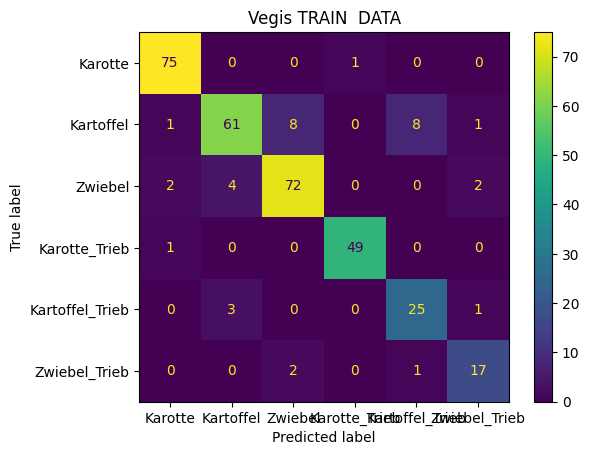

In [11]:
disp = ConfusionMatrixDisplay.from_estimator(
    pipe_logClf,
    X_test,
    y_test,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb', 'Kartoffel_Trieb', 'Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TRAIN  DATA")

print("Vegis TRAIN")
print(disp.confusion_matrix)

In [19]:
cm = confusion_matrix(y_test, pred_test)
cm

array([[75,  0,  0,  1,  0,  0],
       [ 1, 61,  8,  0,  8,  1],
       [ 2,  4, 72,  0,  0,  2],
       [ 1,  0,  0, 49,  0,  0],
       [ 0,  3,  0,  0, 25,  1],
       [ 0,  0,  2,  0,  1, 17]], dtype=int64)

In [47]:
def get_evaluation_metrices(confusion_matrix, vegi=""):
    cls = {'Karotte': 0, 'Kartoffel': 1, 'Zwiebel': 2, 'Karotte_Trieb': 3, 'Kartoffel_Trieb': 4, 'Zwiebel_Trieb': 5}[vegi]
    print(cls)

    tp = confusion_matrix[cls][cls]
    fn = np.sum(confusion_matrix, axis=0)[cls] - tp
    fp = np.sum(confusion_matrix, axis=1)[cls] - tp
    tn = np.sum(confusion_matrix) - (tp + fn + fp)
    print(f"Classifications: tp= {tp} | fn= {fn} | fp= {fp} | tn= {tn}")

    acc = (tp + tn)/ (tp + fn + fp + tn)
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    f1 = 2 * ((prec * rec) / (prec + rec))

    return acc, prec, rec, f1



In [25]:
a = np.array([[1,8,3], [2,4,1], [4,1,0]])
a

array([[1, 8, 3],
       [2, 4, 1],
       [4, 1, 0]])

In [36]:
np.sum(a)

24

In [50]:
accuracy, precision, recall, f1 = get_evaluation_metrices(cm, 'Kartoffel')
print(accuracy, precision, recall, f1)

1
Classifications: tp= 61 | fn= 7 | fp= 18 | tn= 248
0.9251497005988024 0.7721518987341772 0.8970588235294118 0.8299319727891157
